In [14]:
from activity_tracker import utils
import sqlite3
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

data_dir = pathlib.Path("../data")
db_path = data_dir / "sqlite" / "analysis.db"
conn = sqlite3.connect(db_path)

In [2]:
df_subject = pd.read_sql_query("SELECT * FROM subject", conn)
df_visit = pd.read_sql_query("SELECT * FROM visit", conn)
df_measurement = pd.read_sql_query("SELECT * FROM daily_measurement", conn)

In [3]:
start_col = df_measurement.columns.get_loc("percentage_wear_time") + 1
right_cols = df_measurement.columns[start_col:]

# Drop rows where all right-side values are NaN
filtered_df = df_measurement[~df_measurement[right_cols].isna().all(axis=1)].reset_index(drop=True)
filtered_df

,subject_id,date,total_minutes_wear_time,percentage_wear_time,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,floors,calories_bmr,marginal_calories,resting_heart_rate,average_sp_o2,min_sp_o2,max_sp_o2
0,MDE100,2024-10-14,0,0.000000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,1440.0,1411.0,None,1411.0,0.0,NaN,NaN,NaN,NaN
1,MDE100,2024-10-15,0,0.000000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,1440.0,1411.0,None,1411.0,0.0,NaN,NaN,NaN,NaN
2,MDE100,2024-10-16,0,0.000000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,1440.0,1411.0,None,1411.0,0.0,NaN,NaN,NaN,NaN
3,MDE100,2024-10-17,0,0.000000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,1440.0,1411.0,None,1411.0,0.0,NaN,NaN,NaN,NaN
4,MDE100,2024-10-18,0,0.000000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,1440.0,1411.0,None,1411.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4523,MDE99,2024-10-19,13,0.902778,13.0,0.0000,0.0093,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,2.0,1438.0,1462.0,None,1456.0,5.0,NaN,NaN,NaN,NaN
4524,MDE99,2024-10-20,44,3.055556,478.0,0.3094,0.3446,0.0,0.1229,0.0,0.1865,0.0,0.0,0.0,20.0,1420.0,1503.0,None,1456.0,41.0,NaN,NaN,NaN,NaN
4525,MDE99,2024-10-21,5,0.347222,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,1440.0,1456.0,None,1456.0,0.0,NaN,NaN,NaN,NaN
4526,MDE99,2024-10-22,9,0.625000,34.0,0.0245,0.0245,0.0,0.0000,0.0,0.0245,0.0,0.0,0.0,3.0,1352.0,1377.0,None,1370.0,6.0,NaN,NaN,NaN,NaN


In [4]:
len(df_measurement["subject_id"].unique())
len(filtered_df["subject_id"].unique())

38

In [ ]:
# Measure days per subject
measure_days_df = filtered_df.groupby('subject_id').size().reset_index(name='measured_days').sort_values(by='measured_days', ascending=False)

/var/folders/lh/0j8r8lvd4fv6tgr2wz99vbg4f02531/T/ipykernel_86246/3742641221.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette="Set2")
/var/folders/lh/0j8r8lvd4fv6tgr2wz99vbg4f02531/T/ipykernel_86246/3742641221.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette="Set2")
/var/folders/lh/0j8r8lvd4fv6tgr2wz99vbg4f02531/T/ipykernel_86246/3742641221.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette=

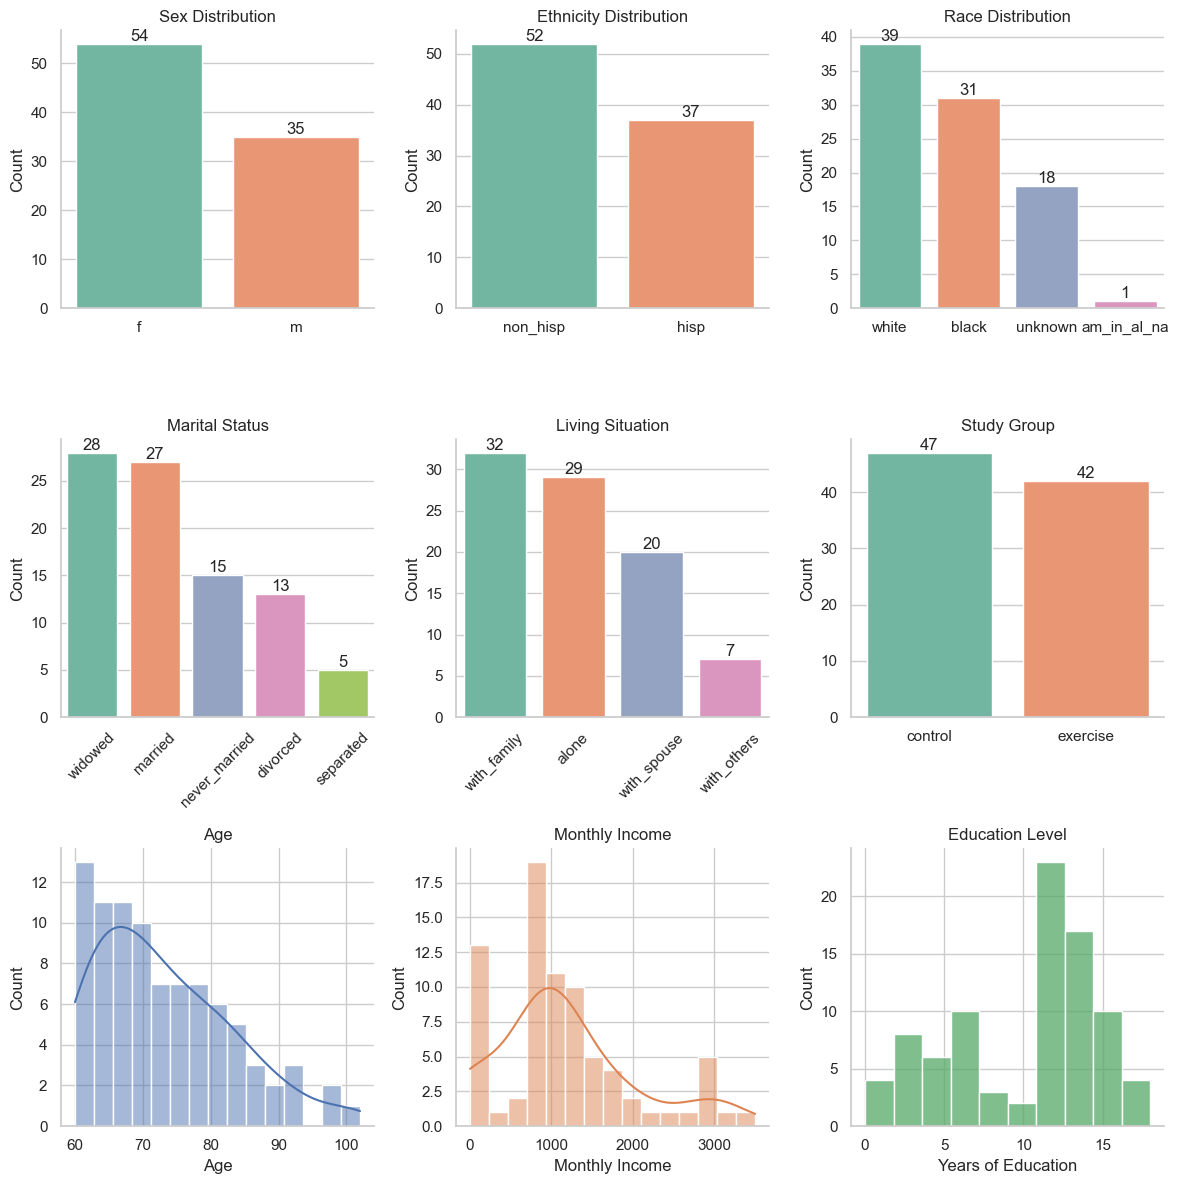

In [ ]:

sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(12, 12), dpi=100)
cat_vars = [
    ("sex", "Sex Distribution"),
    ("ethnicity", "Ethnicity Distribution"),
    ("race", "Race Distribution"),
    ("marital_status", "Marital Status"),
    ("living_situation", "Living Situation"),
    ("group", "Study Group"),
]

for idx, (col, title) in enumerate(cat_vars):
    ax = axes[idx // 3, idx % 3]
    counts = df_subject[col].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=ax, palette="Set2")
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.set_xlabel("")
    if col in ["marital_status", "living_situation"]:
        ax.tick_params(axis='x', rotation=45)
    else:
        ax.tick_params(axis='x', rotation=0)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')
    sns.despine(ax=ax)

sns.histplot(df_subject["age"].dropna(), bins=15, kde=True, ax=axes[2, 0], color="#4c72b0")
axes[2, 0].set_title("Age")
axes[2, 0].set_xlabel("Age")
sns.despine(ax=axes[2, 0])

sns.histplot(df_subject["monthly_income"].dropna(), bins=15, kde=True, ax=axes[2, 1], color="#dd8452")
axes[2, 1].set_title("Monthly Income")
axes[2, 1].set_xlabel("Monthly Income")
sns.despine(ax=axes[2, 1])

sns.histplot(df_subject["education"].dropna(), bins=10, kde=False, ax=axes[2, 2], color="#55a868")
axes[2, 2].set_title("Education Level")
axes[2, 2].set_xlabel("Years of Education")
sns.despine(ax=axes[2, 2])

plt.tight_layout()
plt.show()

In [17]:
df_measurement

,subject_id,date,total_minutes_wear_time,percentage_wear_time,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,floors,calories_bmr,marginal_calories,resting_heart_rate,average_sp_o2,min_sp_o2,max_sp_o2
0,MDE01,2023-09-01,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
1,MDE01,2023-09-02,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
2,MDE01,2023-09-03,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
3,MDE01,2023-09-04,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
4,MDE01,2023-09-05,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60595,MDE99,2025-04-24,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
60596,MDE99,2025-04-25,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
60597,MDE99,2025-04-26,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
60598,MDE99,2025-04-27,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN


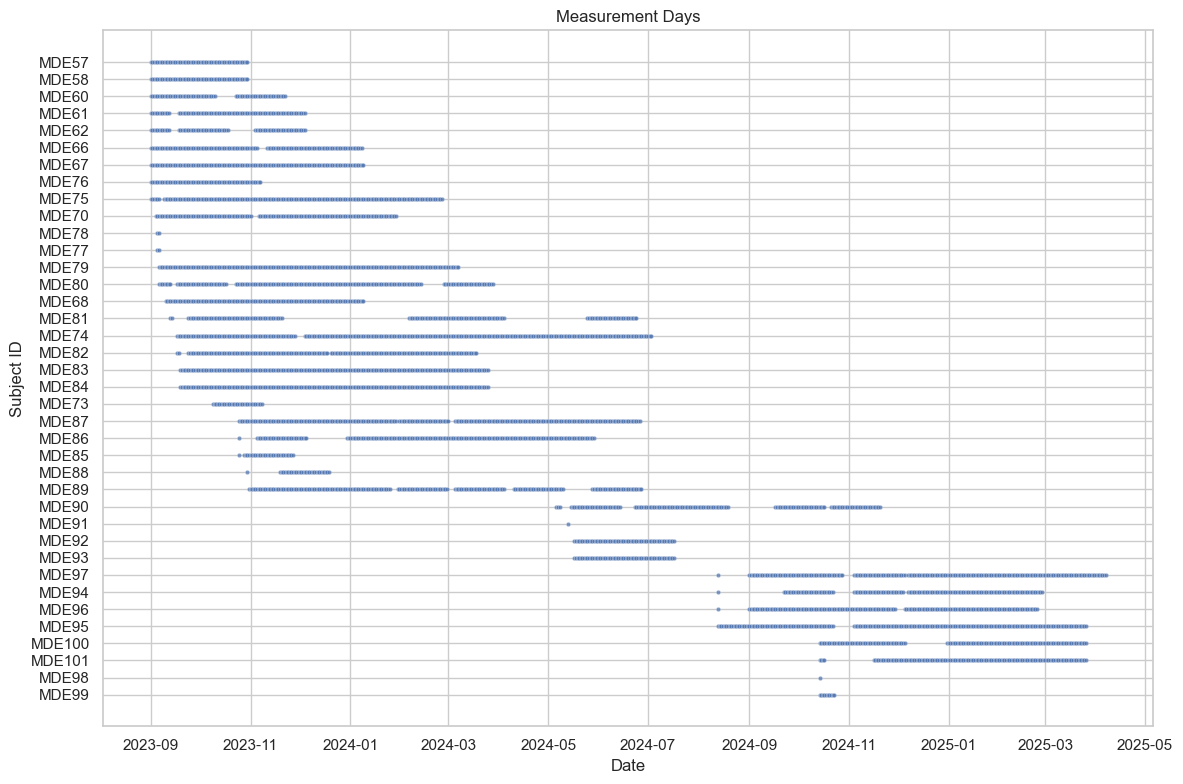

In [ ]:
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=filtered_df,
    x='date',
    y='subject_id',
    s=10,
    alpha=0.7
)
plt.xlabel('Date')
plt.ylabel('Subject ID')
plt.title('Measurement Days')
plt.tight_layout()
plt.show()